This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [2]:
import os
os.sys.path.append('../../')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Analyse the Chi2 metric for reweighting

Lets analyse the use of the chi2 metric to evaluate the reweighting in the different regions and with different features

In [10]:
def weighted_chisquare(f_obs, f_exp, f_obs_err, f_exp_err, ignore_stats = False, residuals=False, stat_lim = 10):
    #obs = 2b
    #exp = 4b
    
    from scipy.stats import chi2
    
    
    #Calculate weighted chi-square using method in arXiv:physics/0605123
    if ignore_stats == False:
        w1 = f_obs[(f_obs > stat_lim) | (f_exp > stat_lim)]
        w2 = f_exp[(f_obs > stat_lim) | (f_exp > stat_lim)]
        s1 = f_obs_err[(f_obs > stat_lim) | (f_exp > stat_lim)]  # noqa
        s2 = f_exp_err[(f_obs > stat_lim) | (f_exp > stat_lim)]  # noqa
    else:
        w1 = f_obs
        w2 = f_exp
        s1 = f_obs_err # noqa
        s2 = f_exp_err # noqa
    
    ndf = len(w1) - 1
    W1 = np.sum(w1)  # noqa
    W2 = np.sum(w2)  # noqa

    pi = (w1*W1 / (s1**2)) + (w2*W2/ (s2**2)) / (((W1**2)/(s1**2)) + ((W2**2)/(s2**2)))


    R = (W1*w2 - W2*w1)**2 / (W1**2 * s2**2 + W2**2 * s1**2)
    R = np.where(((np.isnan(R)) | (np.isinf(R))), 0, R)
    #X2 = np.sum((W1*w2 - W2*w1)**2 / (W1**2 * s2**2 + W2**2 * s1**2))
    X2 = np.sum(R)
    p_value = chi2.sf(X2, ndf)
    if residuals:
        frac = 1 + ((W2**2)*(s1**2))/((W1**2)/(s2**2))
        top = w1-W1*pi
        bottom = s1 * np.sqrt(1 - 1/frac)
        ri = top/bottom
        return (X2, p_value, ndf, ri)
    else:
        return (X2, p_value, ndf)

# Loading example data

In [4]:
storage = '/mnt/storage/lborgna/NNT/MDR_VEC/data/'

In [5]:
fbp16 = storage + 'data_MDR_VEC_16_NN_100_bootstraps.root'


In [6]:
fdb16 = uproot.open(fbp16)

In [7]:
from hh4b_utils.nnt_tools import load_nnt

In [9]:
d16 = load_nnt(fbp16)

In [11]:
d16

run_number  event_number  pass_vbf_sel  mc_sf  trig_sf  jet_trig_sfs  \
0            298773        808585         False    1.0      1.0           1.0   
1            298773       1798465         False    1.0      1.0           1.0   
2            298773       1855518         False    1.0      1.0           1.0   
3            298773       1671576         False    1.0      1.0           1.0   
4            298773       1711116         False    1.0      1.0           1.0   
...             ...           ...           ...    ...      ...           ...   
2031625      310872    2048650141         False    1.0      1.0           1.0   
2031626      310872    2048613299         False    1.0      1.0           1.0   
2031627      310872    2050990889         False    1.0      1.0           1.0   
2031628      310872    2050304167         False    1.0      1.0           1.0   
2031629      310872    2050661806         False    1.0      1.0           1.0   

         truth_mhh  ntag  njets  kinematic_region  ...  vbf_dEtajj  \
0              0.0     2      4                 2  ...     0.00000   
1              0.0     2      4                 2  ...     0.00000   
2              0.0     2      4                 2  ...     0.00000   
3              0.0     2      4                 2  ...     0.00000   
4              0.0     2      5                 2  ...     3.87662   
...            ...   ...    ...               ...  ...         ...   
2031625        0.0     2      4                 0  ...     0.00000   
2031626        0.0     2      4                 0  ...     0.00000   
2031627        0.0     2      4                 0  ...     0.00000   
2031628        0.0     2      4                 0  ...     0.00000   
2031629        0.0     2      4                 0  ...     0.00000   

         vbf_pTvecsum  NN_d24_weight_bstrap_med_16  \
0            0.000000                     0.007541   
1            0.000000                     0.001987   
2            0.000000                     0.007111   
3            0.000000                     0.002745   
4           91.482934                     0.101927   
...               ...                          ...   
2031625      0.000000                     0.011602   
2031626      0.000000                     0.005192   
2031627      0.000000                     0.004447   
2031628      0.000000                     0.001423   
2031629      0.000000                     0.003352   

         NN_d24_weight_bstrap_perc_25_16  NN_d24_weight_bstrap_perc_75_16  \
0                               0.006265                         0.008914   
1                               0.001561                         0.002580   
2                               0.004749                         0.012265   
3                               0.002250                         0.003162   
4                               0.059182                         0.137311   
...                                  ...                              ...   
2031625                         0.009466                         0.014704   
2031626                         0.003865                         0.006271   
2031627                         0.003625                         0.006179   
2031628                         0.001091                         0.001764   
2031629                         0.002729                         0.004174   

         NN_d24_weight_bstrap_IQR_16  NN_d24_weight_VRderiv_bstrap_med_16  \
0                           0.002650                             0.008675   
1                           0.001019                             0.001860   
2                           0.007516                             0.021026   
3                           0.000912                             0.004735   
4                           0.078129                             0.135429   
...                              ...                                  ...   
2031625                     0.005238                             0.009896   
20316

In [17]:
d16.filter(regex='NN_d24_weight_bstrap_med').columns.to_list()[0]

'NN_d24_weight_bstrap_med_16'

In [12]:
from eda_tools.utilities import getNorm

In [20]:
def bkg_histograms(
    df: pd.DataFrame,
    kr: int = 2,
    feature: str = "m_hh",
    bins=50,
    hrange=(200, 1200),
    weights_column: str = None,
):
    mask_kr = df["kinematic_region"] == kr
    mask_4b = df["ntag"] >= 4
    mask_2b = df["ntag"] == 2

    if weights_column is None:
        weights_column = df.filter(regex="NN_d24_weight_bstrap_med").columns.to_list()[
            0
        ]

    mu = getNorm(df, k=kr, weight_column=weights_column)

    h_4b, be = np.histogram(
        df.loc[mask_4b & mask_kr, feature].values, bins=bins, range=hrange
    )

    h_2b, be = np.histogram(
        df.loc[mask_2b & mask_kr, feature].values,
        bins=be,
        weights=mu * df.loc[mask_2b & mask_kr, weights_column].values,
    )
    
    return h_4b, h_2b, be

In [21]:
h_4b, h_2b, be = bkg_histograms(d16)

In [22]:
h_4b, h_2b, be

(array([  1,   1,  16,  52, 143, 368, 644, 902, 955, 929, 814, 728, 622,
        538, 441, 355, 310, 248, 210, 154, 141, 108,  90,  72,  85,  63,
         46,  39,  31,  26,  27,  19,   8,  16,  13,   6,  11,   9,   2,
          6,   5,   4,   2,   4,   3,   0,   1,   1,   1,   0]),
 array([1.45620148e-01, 3.57164751e+00, 1.96063205e+01, 7.50657262e+01,
        2.18681507e+02, 4.43060212e+02, 6.57701176e+02, 8.47172453e+02,
        9.41194730e+02, 9.42525188e+02, 8.59424417e+02, 7.37088165e+02,
        6.29527297e+02, 5.11430647e+02, 4.15353340e+02, 3.39363503e+02,
        2.73318957e+02, 2.24515259e+02, 1.85776602e+02, 1.51513917e+02,
        1.26132147e+02, 1.11584848e+02, 8.99724845e+01, 7.59045018e+01,
        6.32499752e+01, 5.40985373e+01, 4.53647698e+01, 3.75370071e+01,
        3.12213308e+01, 2.62004600e+01, 2.23652059e+01, 1.93752204e+01,
        1.64044008e+01, 1.34336852e+01, 1.16519298e+01, 8.89754060e+00,
        9.16902059e+00, 6.66528454e+00, 5.48971587e+00, 4.41463698e+

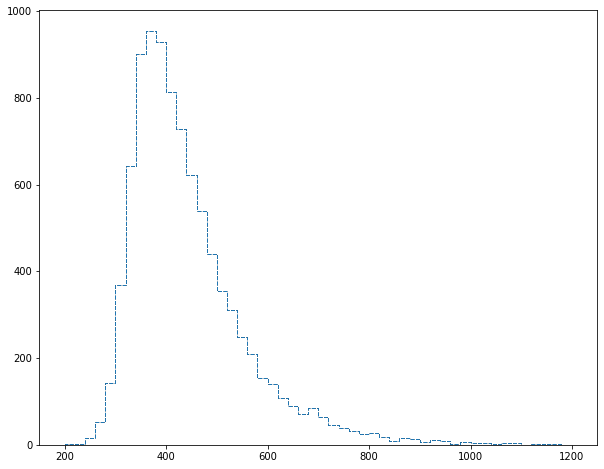

In [35]:
f, ax = plt.subplots(figsize=(10,8))
_,_,_ = ax.hist(be[:-1], bins =be,weights=h_4b, histtype='step',ls='--', color='black')
h_t,_,_ = ax.hist(d16.loc[(d16['ntag']>=4)&(d16['kinematic_region']==2), 'm_hh'].values, bins =50, range=(200,1200),ls='--', histtype='step')

In [37]:
h_t

array([  1.,   1.,  16.,  52., 143., 368., 644., 902., 955., 929., 814.,
       728., 622., 538., 441., 355., 310., 248., 210., 154., 141., 108.,
        90.,  72.,  85.,  63.,  46.,  39.,  31.,  26.,  27.,  19.,   8.,
        16.,  13.,   6.,  11.,   9.,   2.,   6.,   5.,   4.,   2.,   4.,
         3.,   0.,   1.,   1.,   1.,   0.])

In [39]:
h_4b==h_t

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])